## 感知机(perceptron)

### 1. 引入相关包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. perceptron类

$w = w + \eta y_i x_i$

$b = b + \eta y_i$

In [2]:
class Perceptron:
    """感知机"""
    def __init__(self, data_x=None, y=None):
        self.lr_rate = 1
        self.dim = 0
        # 数据
        self.data_x = data_x
        # 标签 {-1， 1}
        self.y = y
        self.w = None
        self.b = 0
        self.__initialize();
    
    def __initialize(self):
        """初始化"""
        self.dim = self.data_x.shape[1]
        self.w = np.random.randn(self.dim)
        self.b = np.random.randn()
#         self.w = np.zeros(self.dim, dtype=np.float64)
        
    def need_update(self):
        """是否需要更新"""
        is_update = False
        for x, label in zip(self.data_x, self.y):
            # 存在误分类
            if label * (np.dot(self.w, x) + self.b) <= 0:
                self.w += self.lr_rate * label * x
                self.b += self.lr_rate * label
                is_update = True
                
        return is_update
    
    def fit(self):
        """模型训练"""
        counter = 0
        while counter <= 100000:
            if not self.need_update():
                break
            counter += 1

### 3.  数据和模型

In [3]:
# 数据构造(感知机一定要是线性可分的数据)
data_x = np.array([[np.random.randn(), np.random.randn()] for i in range(10)] + 
             [[np.random.randn() + 5, np.random.randn() + 3] for i in range(10)])
y = np.array([1.0 for i in range(10)] + [-1.0 for i in range(10)])

# 感知机
model = Perceptron(data_x, y)
model.fit()

### 4.  可视化

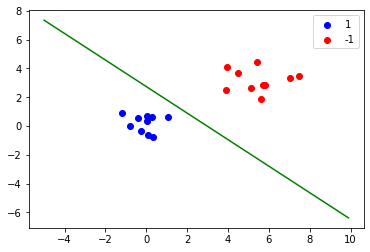

In [4]:
x1 = np.arange(-5, 10, 0.1)
x2 = (- model.b - model.w[0] * x1) / model.w[1]
plt.plot(x1, x2, color='g')
plt.scatter(data_x[:10, 0], data_x[:10, 1], color='b', label='1')
plt.scatter(data_x[10:, 0], data_x[10:, 1], color='r', label='-1')
plt.legend()
plt.show()